# Notebook 6: Explainable Machine Learning

## Objectives
By the end of this notebook, you will be able to:
1.  **Understand the "Black Box" Problem**: Why complex models need explanation.
2.  **Calculate Permutation Importance**: Determine which features matter most.
3.  **Visualize Partial Dependence**: See how a feature affects predictions on average.
4.  **Apply Best Practices**: Use modern libraries like `shap` for deeper insights.

## Prerequisites
-   Notebook 5 (Tree-Based Models)
-   A trained model (we will train one here).


## Part 1: Why Explainability?

As models get more complex (like Random Forests or Neural Networks), they become harder to interpret. We can't just look at coefficients like in Linear Regression.

**Global Interpretability**: How does the model work overall? (e.g., "Price increases with Size").
**Local Interpretability**: Why did the model make *this specific* prediction? (e.g., "This house is expensive because it has a pool").


Model R2 Score: 0.8034078817679783


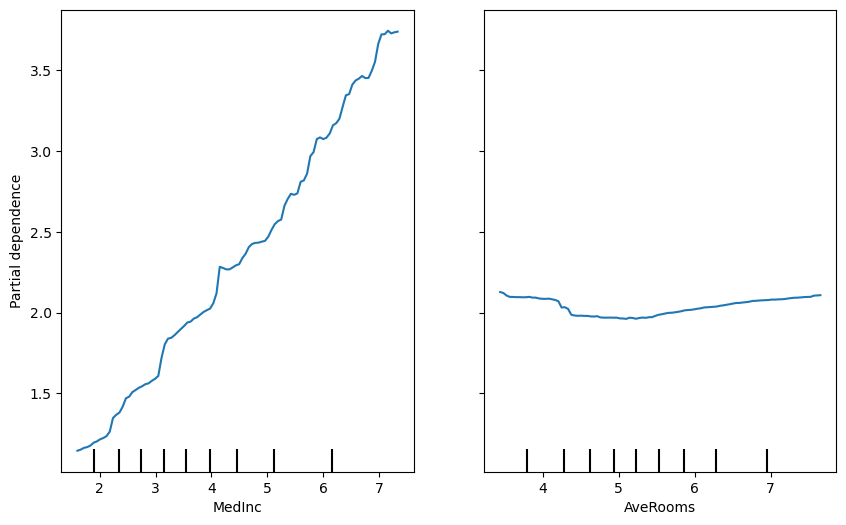

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
from sklearn.model_selection import train_test_split

# Load California Housing Data
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
X = housing.data
y = housing.target

# Train a Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
rf = RandomForestRegressor(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

print("Model R2 Score:", rf.score(X_test, y_test))

# Partial Dependence Plot (PDP)
# How does 'MedInc' (Median Income) affect the predicted price?
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(rf, X_train, ['MedInc', 'AveRooms'], ax=ax)
plt.show()


## Part 2: Permutation Importance

How do we know which features are important?
1.  Measure the model's score (e.g., R2).
2.  Shuffle the values of **one feature** (breaking its relationship with the target).
3.  Measure the score again.
4.  The **drop in score** is the importance of that feature.


/var/folders/kp/fpzklrkj45sfkstgvnwd2vjw0000gn/T/ipykernel_39298/867614774.py:10: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])


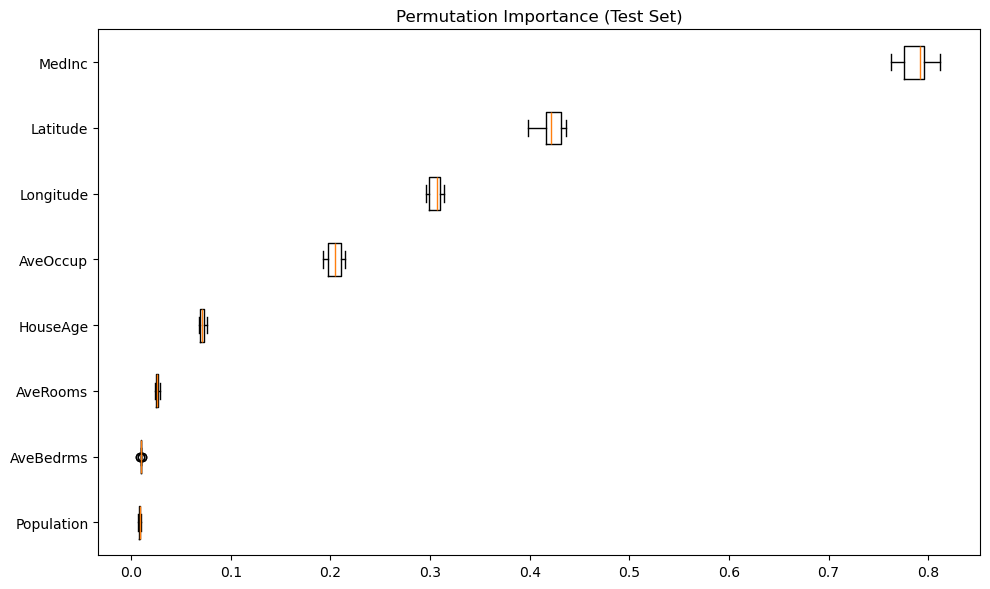

In [2]:
from sklearn.inspection import permutation_importance

# Calculate Permutation Importance
result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Organize results
sorted_idx = result.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=X.columns[sorted_idx])
plt.title("Permutation Importance (Test Set)")
plt.tight_layout()
plt.show()


## Exercises

### Task 1: Diabetes Dataset
1.  Load the Diabetes dataset (`sklearn.datasets.load_diabetes`).
2.  Train a **Random Forest Regressor**.
3.  Plot the **Partial Dependence** for the `bmi` (Body Mass Index) feature. Does higher BMI lead to higher disease progression?

### Task 2: Feature Importance
1.  Calculate **Permutation Importance** for the diabetes model.
2.  Which feature is the most important?


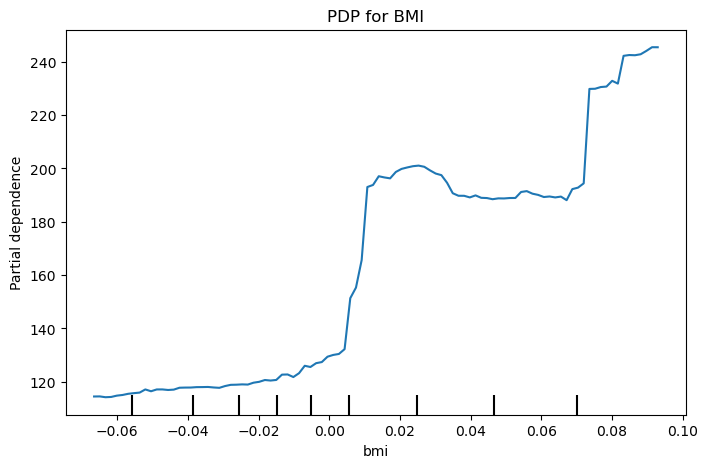

/var/folders/kp/fpzklrkj45sfkstgvnwd2vjw0000gn/T/ipykernel_39298/3085980836.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(result_d.importances[sorted_idx_d].T, vert=False, labels=X_d.columns[sorted_idx_d])


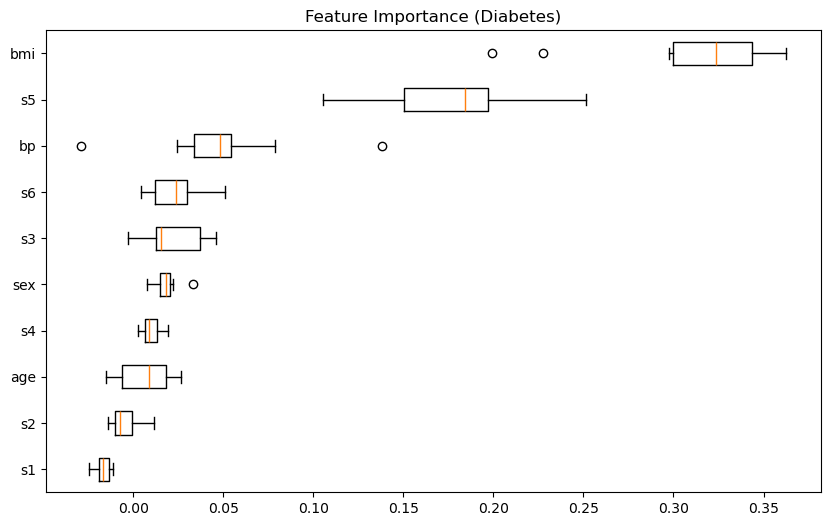

In [3]:
# --- SOLUTION TASK 1 ---
from sklearn.datasets import load_diabetes
diabetes = load_diabetes(as_frame=True)
X_d, y_d = diabetes.data, diabetes.target
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state=42)

rf_d = RandomForestRegressor(n_estimators=50, random_state=42)
rf_d.fit(X_train_d, y_train_d)

fig, ax = plt.subplots(figsize=(8, 5))
PartialDependenceDisplay.from_estimator(rf_d, X_train_d, ['bmi'], ax=ax)
plt.title("PDP for BMI")
plt.show()

# --- SOLUTION TASK 2 ---
result_d = permutation_importance(rf_d, X_test_d, y_test_d, n_repeats=10, random_state=42)
sorted_idx_d = result_d.importances_mean.argsort()

plt.figure(figsize=(10, 6))
plt.boxplot(result_d.importances[sorted_idx_d].T, vert=False, labels=X_d.columns[sorted_idx_d])
plt.title("Feature Importance (Diabetes)")
plt.show()


## Industry Best Practices

### SHAP (SHapley Additive exPlanations)
While PDP and Permutation Importance are great, **SHAP** is the gold standard in industry. It provides consistent, theoretically grounded explanations for both global and local interpretability.

```python
# Example (requires 'shap' library installed)
# import shap
# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(X_test)
# shap.summary_plot(shap_values, X_test)
```

### Simplicity vs Accuracy
Sometimes a simple Linear Regression is better than a complex Random Forest, simply because it is inherently interpretable. Always start simple.
